# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
iris = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz", sep="\t")
iris = iris.dropna()
iris.sample(n=11)

,sepal-length,sepal-width,petal-length,petal-width,target
40,5.1,3.8,1.9,0.4,0
32,6.4,3.1,5.5,1.8,2
135,6.9,3.1,5.4,2.1,2
82,5.8,2.7,4.1,1.0,1
105,6.4,3.2,5.3,2.3,2
38,6.7,3.1,4.4,1.4,1
148,5.0,3.6,1.4,0.2,0
67,6.3,3.3,4.7,1.6,1
74,4.8,3.0,1.4,0.3,0
18,6.3,2.9,5.6,1.8,2


### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [4]:
# YOUR CODE HERE
iris_cols = list(iris.columns)
iris_cols

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']

The first column, 'sepal-length,' refers to the length (measurement of the most extended side) of a sepal from each iris flower, which are the outermost structures that protect the bud before it blooms. This is measured in centimeters.

The next column, 'sepal-width,' refers to the width (measurement of the horizontal, how wide) of a sepal from each iris flower, which are the outermost structures of the flower that protect the bud before it blooms. This is measured in centimeters.

The next column, 'petal-length,' refers to the length (measurement of the most extended side) of a petal from each iris flower, measured in centimeters.

"The next column, 'petal-width,' refers to the length (measurement of the horizontal, how wide) of a petal from each iris flower, measured in centimeters.

The final column, 'target,' refers to the class of the iris plant, which is one of three iris species: Iris Setosa (0), Iris Versicolour (1), or Iris Virginica (2).

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

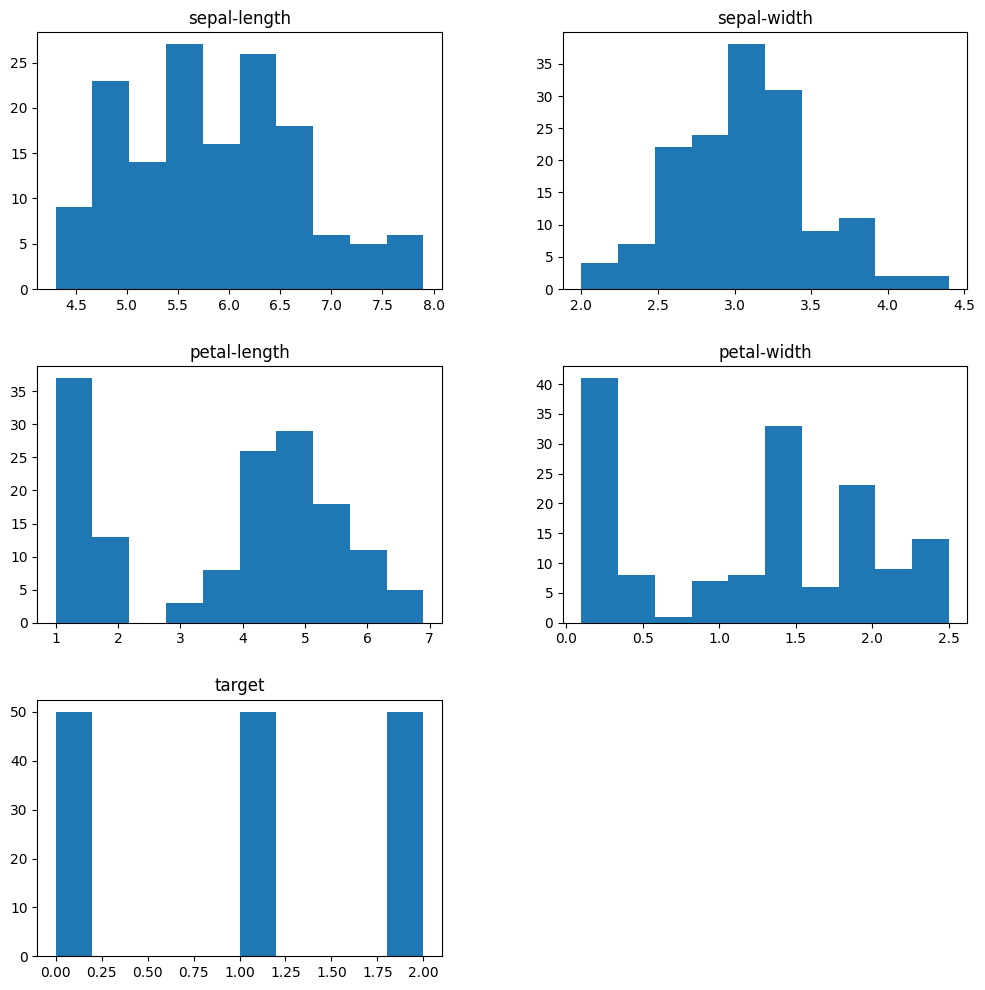

In [5]:
# YOUR CODE HERE
iris.hist(figsize=(12,12), grid=False)
None

Sepal length: Normal

Sepal width: Normal

Petal length: Bimodal

Petal width: Bimodal

Target: Uniform fixed values

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

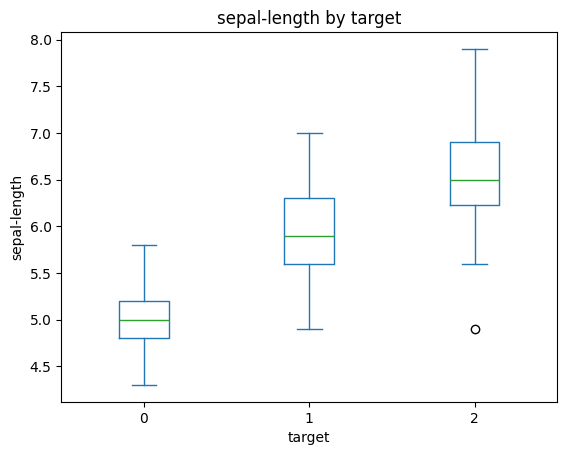

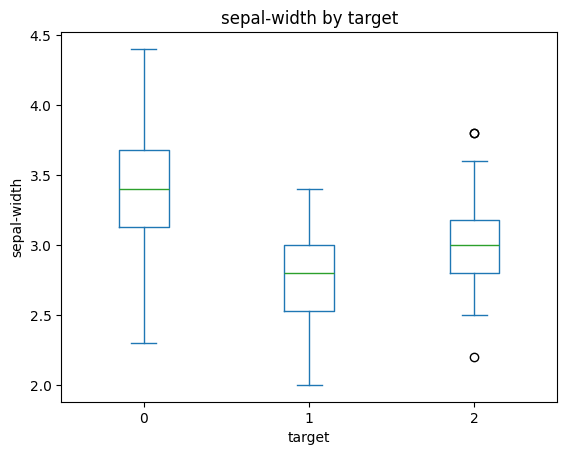

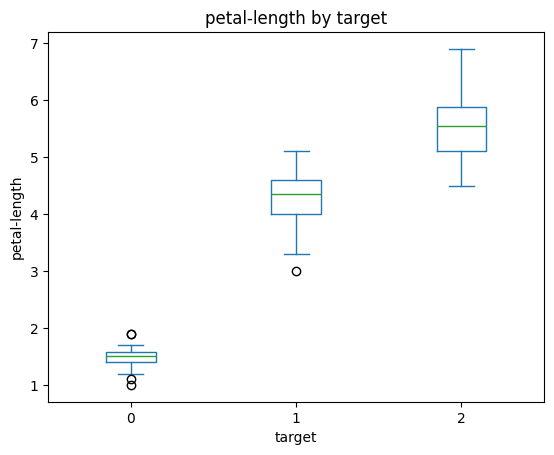

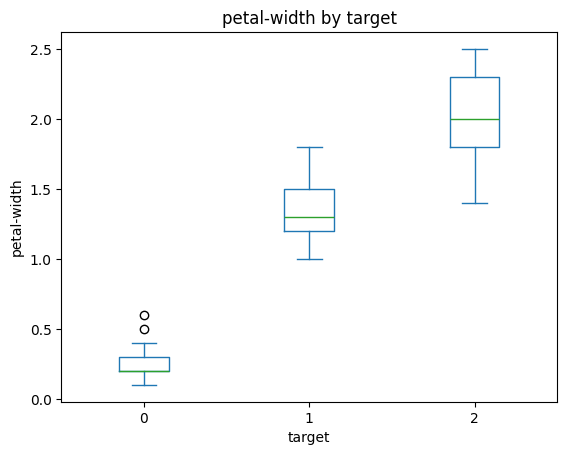

In [6]:
# YOUR CODE HERE
iris_inputs = iris_cols[:-1]
for col in iris_inputs:
    iris.plot.box(column=col, by="target")
    plt.title(f'{col} by target')
    plt.xlabel("target")
    plt.ylabel(col)
    plt.show()

The sepal-length, target pair is dependent. While there is some overlap between the distributions of sepal lengths across species, there does appear to be significant differences between the medians, middle 50% of the data, and the outer ranges of the data. That is, the input value can be predictive of species. To be specific, a low measurement would more likely be 0 = Iris Setosa, a high measurement would more likely be 2 = Iris Virginica, and a middle measurement 1 = Iris Versicolour.

The sepal-width, target pair is dependent. Again, while there is overlap between the distributions of sepal widths across species, there are differences between the medians, middle 50% of the data, and outer ranges of the data. That is, the input value can be predictive of species. To be specific, a low measurement would more likely be 1 = Iris Versicolour, a high measurement would more likely be 0 = Iris Setosa, and a middle measurement 2 = Iris Virginica.

The petal-length, target pair is dependent. There is clear separation between the distributions of petal lengths across species, with very little overlap (which appears only between targets 1 and 2, and not with 0 at all). We can make a strong prediction using the inputs, saying that a low measurement would indicate 0 = Iris Setosa, a middle measurement 1 = Iris Versicolour, and a high measurement 2 = Iris Virginica.

The petal-width, target pair is dependent. There is again a clear distinction between the distributions of petal widths across species, with moderate overlap between targets 1 and 2 and none with 0. We can make strong predictions that low measurements correspond to 0 = Iris Setosa, high measurements are 2 = Iris Virginica, and middle measurements are 1 = Iris Versicolour.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

coefficients = array([[ 0.19208399],
       [-0.10974146],
       [-0.04424045],
       [ 0.22700138],
       [ 0.60989412]])
The mean squared error of the model is 0.04638508831122695.


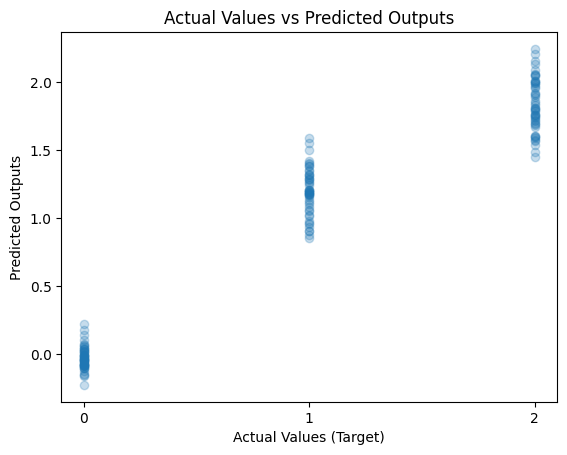

In [7]:
# YOUR CODE HERE
X_5 = iris[iris_inputs].values
X_5 = np.insert(X_5, 0, 1, axis=1)
Y_5 = iris["target"].values.reshape(-1, 1)
iris_coeffs_5 = np.linalg.lstsq(X_5, Y_5, rcond=None)[0]
print(f"coefficients = {iris_coeffs_5!r}")
Y_5_pred = X_5 @ iris_coeffs_5
iris_mean_squared_error_5 = np.mean((Y_5 - Y_5_pred) ** 2)
print(f"The mean squared error of the model is {iris_mean_squared_error_5}.")

plt.scatter(Y_5, Y_5_pred, alpha=0.25)
plt.xlabel("Actual Values (Target)")
plt.ylabel("Predicted Outputs")
plt.title("Actual Values vs Predicted Outputs")
plt.xticks([0, 1, 2])
plt.show()

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


The mean squared error using sepal-length is 0.2583986123119254.


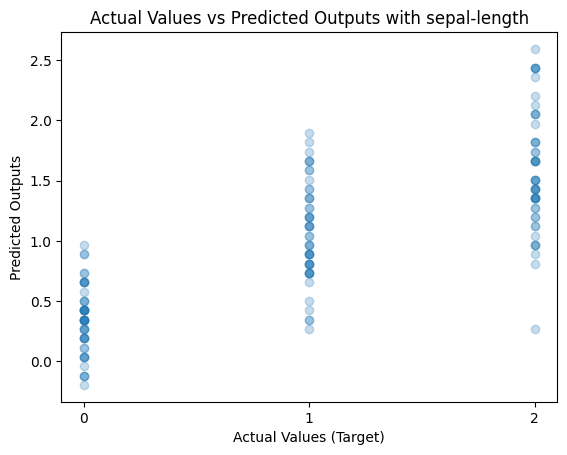

The mean squared error using sepal-width is 0.5493765900582832.


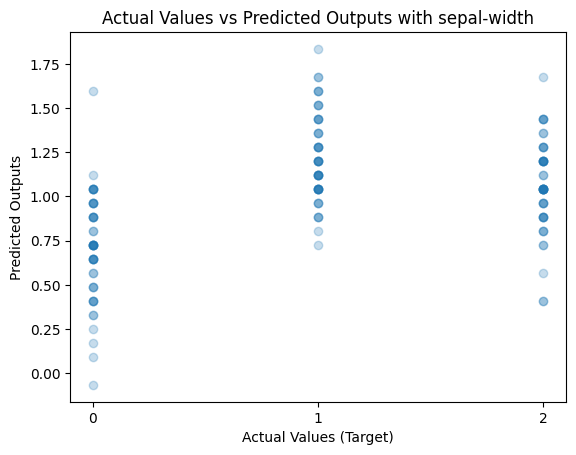

The mean squared error using petal-length is 0.0662121653734708.


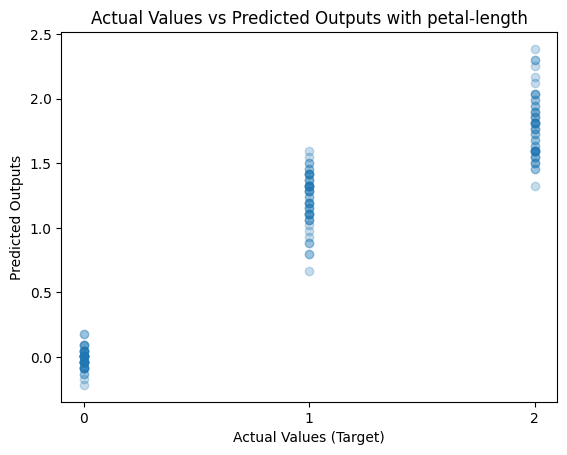

The mean squared error using petal-width is 0.05678463583919237.


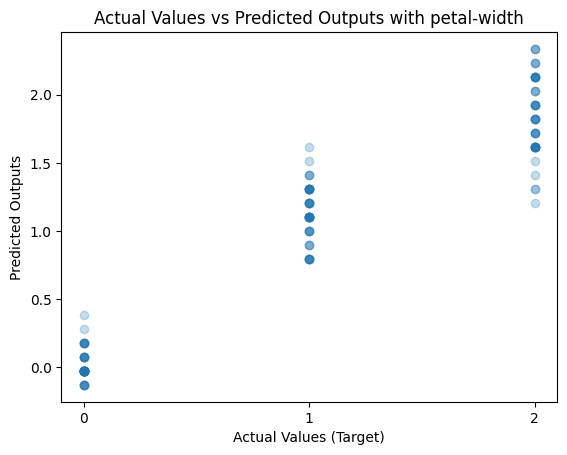

In [8]:
# YOUR CODE HERE
Y_6 = iris["target"].values.reshape(-1, 1)
for col in iris_inputs:
    X_6 = iris[[col]].values
    X_6 = np.insert(X_6, 0, 1, axis=1)
    iris_coeffs_6 = np.linalg.lstsq(X_6, Y_6, rcond=None)[0]
    Y_6_pred = X_6 @ iris_coeffs_6
    iris_mean_squared_error_6 = np.mean((Y_6 - Y_6_pred) ** 2)
    print(f"The mean squared error using {col} is {iris_mean_squared_error_6}.")

    plt.scatter(Y_6, Y_6_pred, alpha=0.25)
    plt.xlabel("Actual Values (Target)")
    plt.ylabel("Predicted Outputs")
    plt.title(f"Actual Values vs Predicted Outputs with {col}")
    plt.xticks([0, 1, 2])
    plt.show()


The input column that gives the best linear model of the target on its own is petal-width, since it has the lowest mean squared error. However, the mean squared error of the model using just petal-width is bigger than the mean squared error of the model using all of the input columns, which makes it a worse model.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

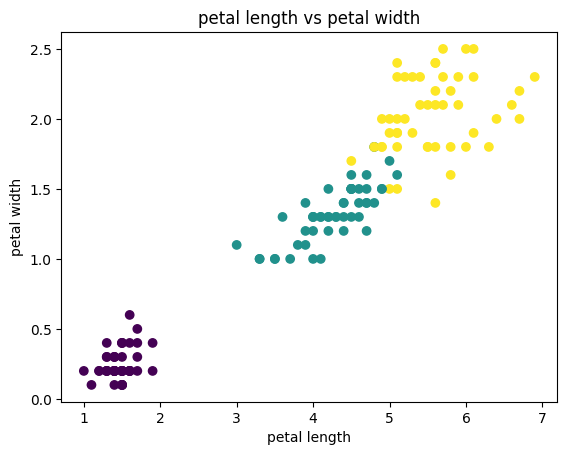

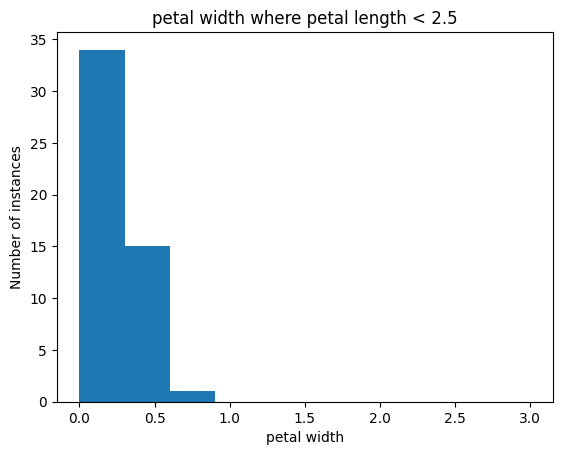

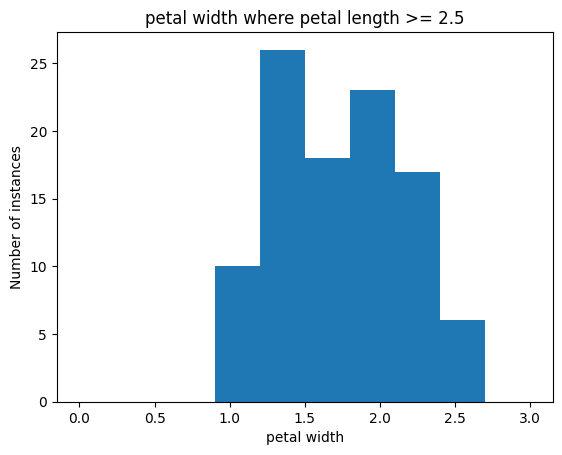

In [9]:
# YOUR CODE HERE
plt.scatter(iris["petal-length"], iris["petal-width"], c=iris["target"])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal length vs petal width")
plt.show()

t = 2.5
left_split = iris[iris["petal-length"] < t]["petal-width"]
right_split = iris[iris["petal-length"] >= t]["petal-width"]
plt.hist(left_split, range=(0, 3))
plt.title("petal width where petal length < 2.5")
plt.xlabel("petal width")
plt.ylabel("Number of instances")
plt.show()

plt.hist(right_split, range=(0, 3))
plt.title("petal width where petal length >= 2.5")
plt.xlabel("petal width")
plt.ylabel("Number of instances")
plt.show()

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [22]:
# YOUR CODE HERE
iris_normalized = iris[iris_inputs] / iris[iris_inputs].std()
iris_normalized.std()

iris_normalized_pca = PCA()
iris_normalized_pca.fit(iris_normalized.dropna())
iris_components = pd.DataFrame(iris_normalized_pca.components_, columns=iris_inputs)
iris_components

,sepal-length,sepal-width,petal-length,petal-width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,0.721017,-0.242033,-0.140892,-0.633801
3,-0.261996,0.124135,0.801154,-0.523546


In [24]:
iris_normalized_projected = iris_normalized @ iris_components.iloc[:2].T
iris_normalized_projected

,0,1
0,5.822121,9.675641
1,5.207638,7.582248
2,5.125836,8.976265
3,6.387085,11.842318
4,5.816396,9.847624
...,...,...
145,2.000124,9.789828
146,1.894221,10.807575
147,1.794544,9.585847
148,1.577043,9.966611


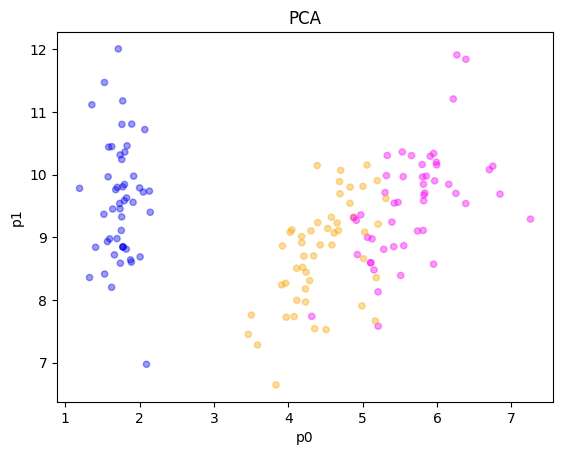

In [25]:
color_map = {0: "blue",
             1: "orange",
             2: "magenta"}
color_map

iris_normalized_projected.plot.scatter(0, 1, alpha=0.4, color=iris["target"].map(color_map))
plt.title("PCA")
plt.xlabel("p0")
plt.ylabel("p1")
None

array([2.91081808, 0.92122093, 0.14735328, 0.02060771])

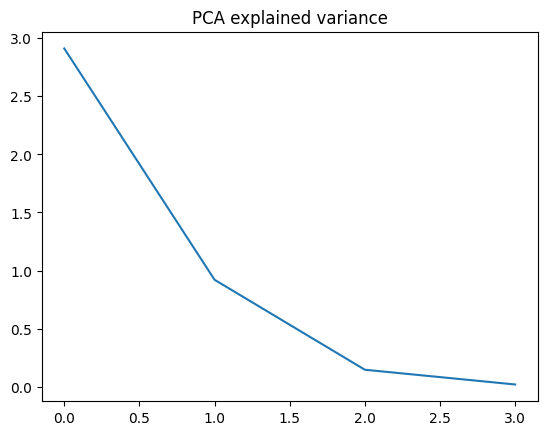

In [37]:
plt.plot(iris_normalized_pca.explained_variance_)
plt.title("PCA explained variance")
None
iris_normalized_pca.explained_variance_

In [43]:
first_pc = iris_normalized_pca.explained_variance_[0] / np.sum(iris_normalized_pca.explained_variance_)
print(first_pc)
second_pc = iris_normalized_pca.explained_variance_[1] / np.sum(iris_normalized_pca.explained_variance_)
print(second_pc)
first_two = first_pc + second_pc
print(f"The first half of the principal components explains {first_two * 100:.2f}% of the data variance.")

0.7277045209380161
0.23030523267681033
The first half of the principal components explains 95.80% of the data variance.


In [32]:
from sklearn.linear_model import LinearRegression

X_pca = iris_normalized.values @ iris_components.iloc[:2].values.T
Y_pca = iris["target"].values.reshape(-1, 1)
model_iris = LinearRegression()
model_iris.fit(X_pca, Y_pca)

Y_pred_pca = model_iris.predict(X_pca)

In [34]:
iris_pca_mean_squared_error = np.mean((Y_pca - Y_pred_pca) ** 2)
print(iris_pca_mean_squared_error)

0.0714672509163902


The mean squared error of the previous model was 0.04638508831122695, while the mean squared error of this model is 0.0714672509163902. This means that the previous model is better at predicting the target values, likely because all of the input values were considered as opposed to only the first two principal components in this recent model.

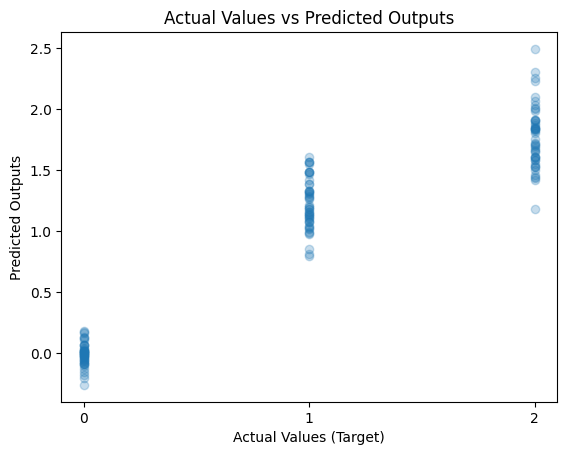

In [35]:
plt.scatter(Y_pca, Y_pred_pca, alpha=0.25)
plt.xlabel("Actual Values (Target)")
plt.ylabel("Predicted Outputs")
plt.title("Actual Values vs Predicted Outputs")
plt.xticks([0, 1, 2])
plt.show()

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [11]:
for i in range(len(iris_inputs)):
    for c in range(i+1, len(iris_inputs)):
        x_input = iris_inputs[i]
        y_input = iris_inputs[c]
        input_corr = iris[x_input].corr(iris[y_input])
        print(f"The correlation between {x_input} and {y_input} is {input_corr}.")

The correlation between sepal-length and sepal-width is -0.10936924995064937.
The correlation between sepal-length and petal-length is 0.8717541573048725.
The correlation between sepal-length and petal-width is 0.8179536333691628.
The correlation between sepal-width and petal-length is -0.42051609640115456.
The correlation between sepal-width and petal-width is -0.3565440896138058.
The correlation between petal-length and petal-width is 0.9627570970509658.


The input columns with the highest correlation are petal-length and petal-width. This is reflected in the first principal component. The weights for sepal-length, sepal-width, petal-length, and petal-width for the first principal component are as follows, respectively: 0.522372, -0.263355, 0.581254, and 0.565611. This demonstrates that petal length and petal width are strongly positive correlated, since their weights are similar and positive. In other words, petal length and petal width vary (and increase) together.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

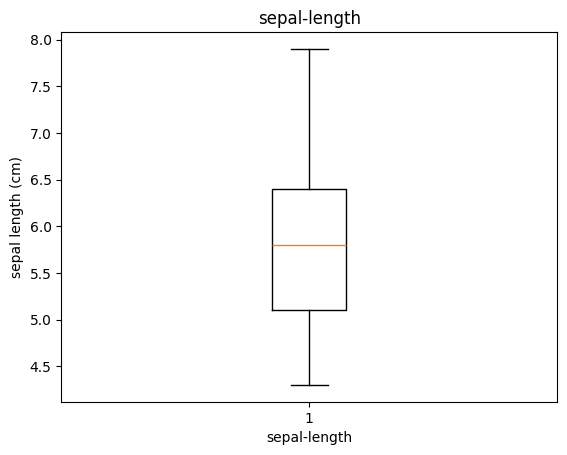

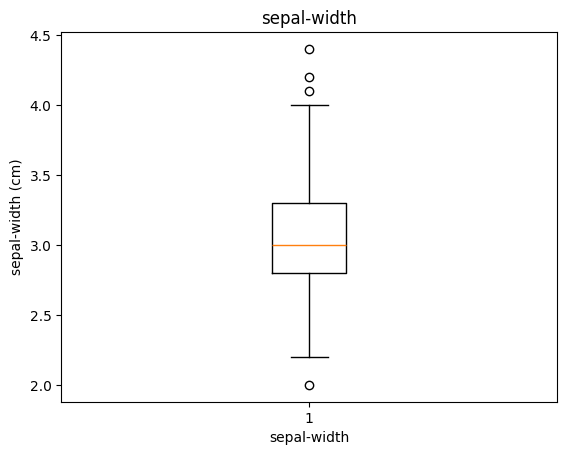

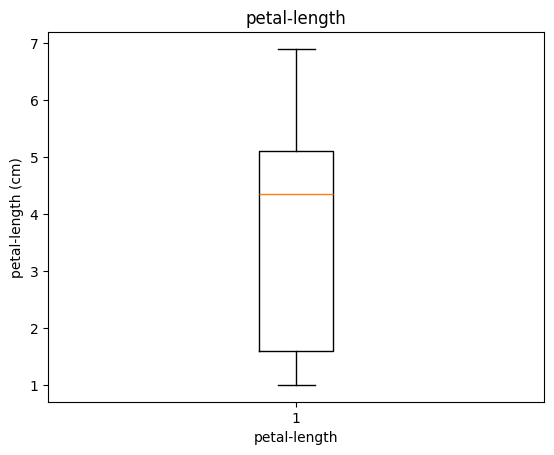

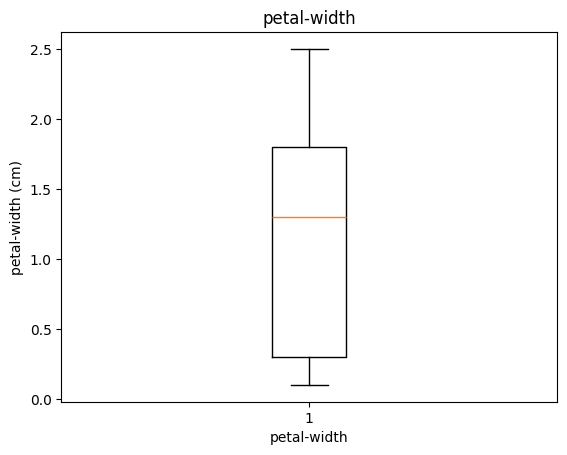

     sepal-length  sepal-width  petal-length  petal-width  target
29            5.5          4.2           1.4          0.2       0
88            5.2          4.1           1.5          0.1       0
118           5.7          4.4           1.5          0.4       0
     sepal-length  sepal-width  petal-length  petal-width  target
118           5.7          4.4           1.5          0.4       0
Sepal-width max: 4.4
Sepal-width max without outlier: 4.2
Sepal-width mean: 3.0540000000000003
Sepal-width mean without outlier: 3.0449664429530205
Sepal-width standard deviation: 0.4335943113621737
Sepal-width standard deviation without outlier: 0.42065525488327205
Z-score: 3.104284269254884
Sepal-width variance: 0.1880040268456376
Sepal-width variance without outlier: 0.17695084346091058


In [12]:
# YOUR CODE HERE
plt.boxplot(iris["sepal-length"])
plt.title("sepal-length")
plt.xlabel("sepal-length")
plt.ylabel("sepal length (cm)")
plt.show()
plt.boxplot(iris["sepal-width"])
plt.title("sepal-width")
plt.xlabel("sepal-width")
plt.ylabel("sepal-width (cm)")
plt.show()
plt.boxplot(iris["petal-length"])
plt.title("petal-length")
plt.xlabel("petal-length")
plt.ylabel("petal-length (cm)")
plt.show()
plt.boxplot(iris["petal-width"])
plt.title("petal-width")
plt.xlabel("petal-width")
plt.ylabel("petal-width (cm)")
plt.show()

print(iris[iris["sepal-width"] > 4])

print(iris[iris["sepal-width"] == 4.4])

outlier_index = 118

iris_max = iris["sepal-width"].max()
iris_max_no_outlier = iris.drop(outlier_index)["sepal-width"].max()
print(f"Sepal-width max: {iris_max}")
print(f"Sepal-width max without outlier: {iris_max_no_outlier}")

iris_mean = np.mean(iris["sepal-width"])
iris_mean_no_outlier = np.mean(iris.drop(outlier_index)["sepal-width"])
print(f"Sepal-width mean: {iris_mean}")
print(f"Sepal-width mean without outlier: {iris_mean_no_outlier}")

iris_std = np.std(iris["sepal-width"], ddof=1)
iris_std_no_outlier = np.std(iris.drop(outlier_index)["sepal-width"], ddof=1)
print(f"Sepal-width standard deviation: {iris_std}")
print(f"Sepal-width standard deviation without outlier: {iris_std_no_outlier}")

iris_z_score = (4.4 - iris_mean) / iris_std
print(f"Z-score: {iris_z_score}")

iris_variance = np.var(iris["sepal-width"], ddof=1)
iris_variance_no_outlier = np.var(iris.drop(outlier_index)["sepal-width"], ddof=1)
print(f"Sepal-width variance: {iris_variance}")
print(f"Sepal-width variance without outlier: {iris_variance_no_outlier}")

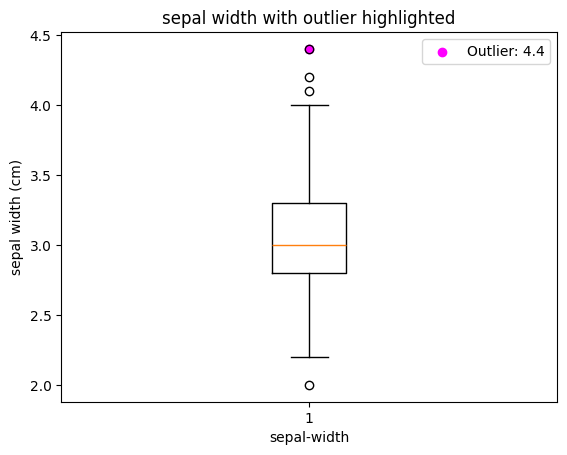

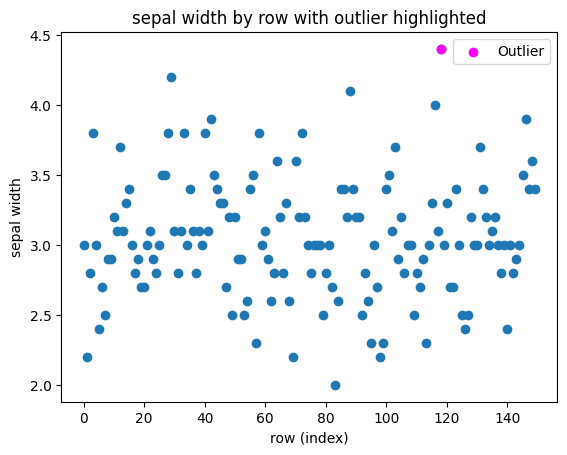

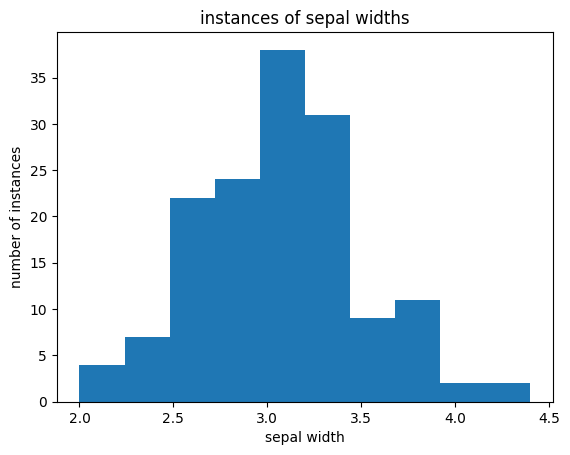

In [13]:
plt.boxplot(iris["sepal-width"])
plt.scatter(1, 4.4, color="magenta", label="Outlier: 4.4")
plt.title("sepal width with outlier highlighted")
plt.xlabel("sepal-width")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.show()

plt.scatter(range(len(iris)), iris["sepal-width"])
plt.scatter(118, 4.4, color="magenta", label="Outlier")
plt.title("sepal width by row with outlier highlighted")
plt.xlabel("row (index)")
plt.ylabel("sepal width")
plt.legend()
plt.show()

plt.hist(iris["sepal-width"])
plt.title("instances of sepal widths")
plt.xlabel("sepal width")
plt.ylabel("number of instances")
plt.show()

My first step was visualing the values of the features using boxplots. Boxplots show the interquartile range (from the first to the third quartile, which represents the middle 50% of the data), the median, max and min values, and the spread of the remaining lower and upper 25% of the data (excluding outliers). A particular relevant advantage is that boxplots also show outliers. After plotting boxplots for each feature, I could see there were outliers for the sepal-width feature, which is where I thus decided to focus my attention. 

I identified the outlier row by querying the data for sepal widths greater than 4, which I could visually see on the boxplot. This gave me three rows, but I could see the largest measurement for sepal width was 4.4. I chose this row because the value for sepal width was the furthest from the interquartile range in the boxplot. I then queried just this row and found its index to use in further analysis.

The first criterion I used was the max, which is the largest value for sepal width in the dataset. This was used because extrema are outliers. I could visually see that the value for sepal width in this row was the max of the values for this column. I compared the max with and without the outlier sepal width, which were 4.4 and 4.2, respectively. This is significant because the  outlier value changes the range of the sepal width data.

The next criterion I used was the mean, which is the average value for sepal width in the dataset. This was used because outliers affect the average value easily, as they pull it in their direction. I compared the mean with and without the outlier sepal width, which were about 3.054 and 3.045, respectively. This is significant because the outlier value increases the average value for sepal width.

The next criterion I used was standard deviation, which measures how far away values are from the mean. This was used because it shows the spread of values around the average, which makes seeing values that fall outside of the bulk of the spread easier. I compared the standard deviation with and without the outlier sepal width, which were about 0.4336 and 0.421, respectively. This is significant because the dispersion of values increases with the outlier value's presence.

The next criterion I used was the z-score, which measures how many standard deviations a value is from the mean. This was used because it shows how far the outlier value is from the average. The z-score was about 3.104, which indiciates the value is signficantly far from the average value. This is significant because it confirms the outlier value is an extreme one.

The next criterion I used was variance, which measures the spread of the data (how the values vary with each other). This was used because an extreme value would change the values' relationships. I compared the variance with and without the outlier sepal width, which were about 0.188 and 0.177, respectively. This shows that the outlier value increases how spread apart the values are from one another.

Altogether, I saw after plotting all of the features that the only visible outliers were contained in the sepal-width column. Examining that, I saw that the value of 4.4 was the most extreme, making its row my candidate for an outlier row. After seeing how this one value affects the max, mean, variance, standard deviation, and z-score, I am confident that this row qualifies as an outlier row.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE